# Sphere-like minimization problems
## Scalability analysis

This notebook will hold several scalability experiments which will involve the sphere function and/or sphere-like functions.

### Setup

In [1]:
import sys
CODEBASE = "./codebase"
if CODEBASE not in sys.path:
    sys.path.append(CODEBASE)

from cooperative_evolution_optimizers import GrayBoxOptimizer, BlackBoxOptimizer
from differential_evolution import DifferentialEvolution as DE
from evolution_strategies import EvolutionStrategies as ES
from particle_swarm_optimization import ParticleSwarmOptimization as PSO
from particle_swarm_optimization import PSOInteractions

from fitness_functions import FunctionFactory
get_sphere = FunctionFactory.get_sphere

import numpy as np
import matplotlib.pyplot as plt
from time import time

# Fully decomposable, independent problems

## (A) Warm-up

### Differential Evolution

In [8]:
sphere = get_sphere()
# genome length
L = 24 # 24 has lots of divisors
n_functions = [1,2,3,4,6,8,12,24]

# lower and upper bounds, not centered around 0
LB = [-5]*L
UB = [6]*L
VTR = pow(10, -6) # value to reach
GAs = [DE]
arguments = [
    {"population_size": 100,
     "crossover_probability": 0.25, "f_weight": 0.1}
]

for n in n_functions:
    print("#"*10 + " {:2} functions ".format(n) + "#"*10)
    input_spaces = [list(range(i*(L//n), (i+1)*(L//n))) for i in range(n)]
    train_partition = input_spaces[::]
    
    gbo = GrayBoxOptimizer(functions = [sphere]*n,
                          input_spaces = input_spaces,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = GAs*n,
                          genetic_algorithm_arguments = arguments*n,
                          max_generations = 300,
                          goal_fitness = VTR)
    
    while not gbo.has_converged():
        gbo.evolve()
    print("{:5} fitness reached after {:3} gens".format(gbo.get_elite_fitness(), gbo._generations))

##########  1 functions ##########
8.453814974831543e-07 fitness reached after 242 gens
##########  2 functions ##########
9.93328403890967e-07 fitness reached after 144 gens
##########  3 functions ##########
8.856183521697143e-07 fitness reached after  95 gens
##########  4 functions ##########
8.395843954659902e-07 fitness reached after  76 gens
##########  6 functions ##########
5.102284539601509e-07 fitness reached after  54 gens
##########  8 functions ##########
7.326221381575713e-07 fitness reached after  39 gens
########## 12 functions ##########
5.644817956743987e-07 fitness reached after  26 gens
########## 24 functions ##########
4.969693547659516e-07 fitness reached after  11 gens


### Particle Swarm Optimization

In [11]:
sphere = get_sphere()
# genome length
L = 24 # 24 has lots of divisors
n_functions = [1,2,3,4,6,8,12,24]

# lower and upper bounds, not centered around 0
LB = [-5]*L
UB = [6]*L
VTR = pow(10, -6) # value to reach
GAs = [PSO]
arguments = [
    {"population_size": 100,
     "interaction": PSOInteractions.FIPS}
]

for n in n_functions:
    print("#"*10 + " {:2} functions ".format(n) + "#"*10)
    input_spaces = [list(range(i*(L//n), (i+1)*(L//n))) for i in range(n)]
    train_partition = input_spaces[::]
    
    gbo = GrayBoxOptimizer(functions = [sphere]*n,
                          input_spaces = input_spaces,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = GAs*n,
                          genetic_algorithm_arguments = arguments*n,
                          max_generations = 300,
                          goal_fitness = VTR)
    
    while not gbo.has_converged():
        gbo.evolve()
    print("{:5} fitness reached after {:3} gens".format(gbo.get_elite_fitness(), gbo._generations))

##########  1 functions ##########
5.027879005677162e-06 fitness reached after 300 gens
##########  2 functions ##########
2.1016312927825898e-06 fitness reached after 300 gens
##########  3 functions ##########
2.686206986805074e-06 fitness reached after 300 gens
##########  4 functions ##########
1.1728807890121597e-05 fitness reached after 300 gens
##########  6 functions ##########
5.770386058298609e-06 fitness reached after 300 gens
##########  8 functions ##########
7.808251550209603e-06 fitness reached after 300 gens
########## 12 functions ##########
4.141535998326688e-05 fitness reached after 300 gens
########## 24 functions ##########
0.00010878221710030928 fitness reached after 300 gens


### Evolution Strategies

In [13]:
sphere = get_sphere()
# genome length
L = 12 # 12 has lots of divisors
n_functions = [1,2,3,4,6,12]

# lower and upper bounds, not centered around 0
LB = [-5]*L
UB = [6]*L
VTR = pow(10, -6) # value to reach
GAs = [ES]
arguments = [
    {"offspring_size": 100, "population_size": 100}
]

for n in n_functions:
    print("#"*10 + " {:2} functions ".format(n) + "#"*10)
    input_spaces = [list(range(i*(L//n), (i+1)*(L//n))) for i in range(n)]
    train_partition = input_spaces[::]
    
    gbo = GrayBoxOptimizer(functions = [sphere]*n,
                          input_spaces = input_spaces,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = GAs*n,
                          genetic_algorithm_arguments = arguments*n,
                          max_generations = 300,
                          goal_fitness = VTR)
    
    while not gbo.has_converged():
        gbo.evolve()
    print("{:5} fitness reached after {:3} gens".format(gbo.get_elite_fitness(), gbo._generations))

##########  1 functions ##########
0.19492969686625097 fitness reached after 300 gens
##########  2 functions ##########
0.00973866842245358 fitness reached after 300 gens
##########  3 functions ##########
0.00014486787719621716 fitness reached after 300 gens
##########  4 functions ##########
1.5957974151724327e-05 fitness reached after 300 gens
##########  6 functions ##########
8.396815982953898e-07 fitness reached after  88 gens
########## 12 functions ##########
6.291851173797246e-07 fitness reached after  13 gens


## (B) Sphere with 5 inputs, increase number of functions

### Differential Evolution, PSO and Evolution Strategies

<class 'differential_evolution.DifferentialEvolution'>
K 1
K 2
K 3
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
K 1
K 2
K 3
<class 'evolution_strategies.EvolutionStrategies'>
K 1
K 2
K 3


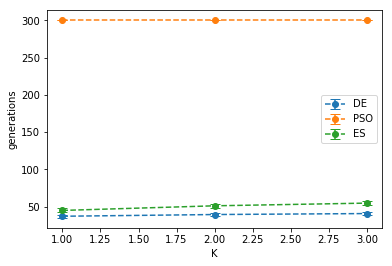

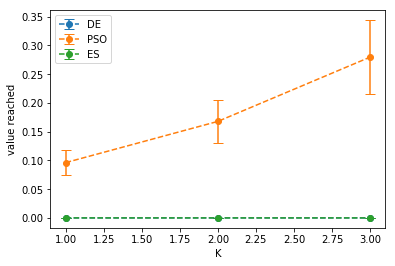

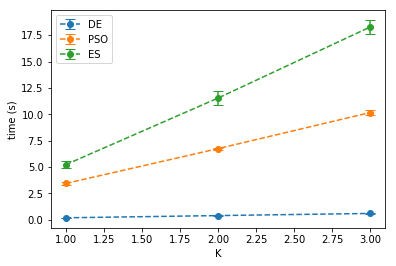

In [3]:
sphere = get_sphere()
subL = 5
VTR = pow(10, -4)
# repeat each experiment N times
N = 10
# vary number of functions up to kmax
Kmax = 3
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO, ES]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS},
    {"population_size": 100, "offspring_size": 700}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((Kmax, N))
    generations = np.zeros((Kmax, N))
    values_reached = np.zeros((Kmax, N))
    for K in Ks:
        print("K {}".format(K))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[K-1, exp] = time() - start
            generations[K-1, exp] = gbo._generations
            values_reached[K-1, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(Ks, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(Ks, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(Ks, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("K")
plt.ylabel("generations")
plt.legend(["DE", "PSO", "ES"])

plt.figure(2)
plt.xlabel("K")
plt.ylabel("value reached")
plt.legend(["DE", "PSO", "ES"])

plt.figure(3)
plt.xlabel("K")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO", "ES"])

plt.show()

### Differential Evolution and Particle Swarm Optimization

<class 'differential_evolution.DifferentialEvolution'>
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
K 20
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
K 20


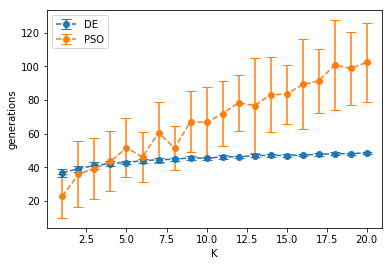

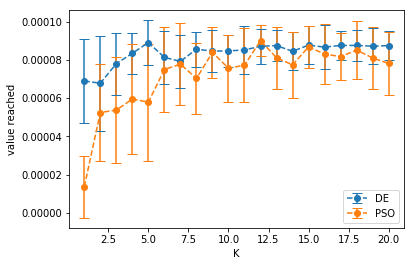

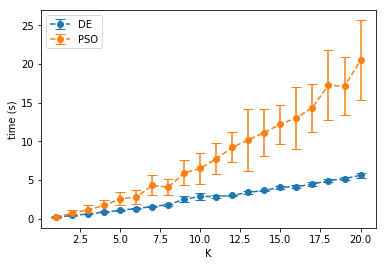

In [29]:
sphere = get_sphere()
subL = 5
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# vary number of functions up to kmax
Kmax = 20
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((Kmax, N))
    generations = np.zeros((Kmax, N))
    values_reached = np.zeros((Kmax, N))
    for K in Ks:
        print("K {}".format(K))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[K-1, exp] = time() - start
            generations[K-1, exp] = gbo._generations
            values_reached[K-1, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(Ks, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(Ks, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(Ks, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("K")
plt.ylabel("generations")
plt.legend(["DE", "PSO"])

plt.figure(2)
plt.xlabel("K")
plt.ylabel("value reached")
plt.legend(["DE", "PSO"])

plt.figure(3)
plt.xlabel("K")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO"])

plt.show()

## (C) 5 sphere functions, increase input size

###  Differential Evolution, Particle Swarm Optimization

<class 'differential_evolution.DifferentialEvolution'>
subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64


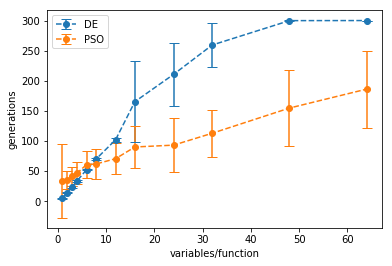

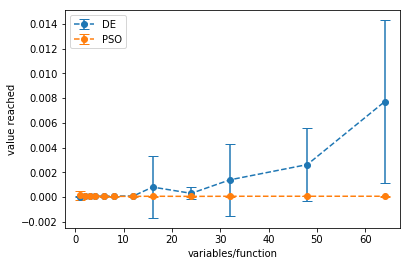

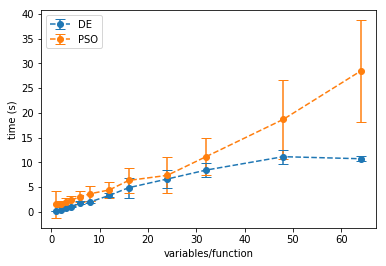

In [31]:
sphere = get_sphere()
subLs = [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# number of functions is fixed
K = 5
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((len(subLs), N))
    generations = np.zeros((len(subLs), N))
    values_reached = np.zeros((len(subLs), N))
    for idx, subL in enumerate(subLs):
        print("subL {}".format(subL))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[idx, exp] = time() - start
            generations[idx, exp] = gbo._generations
            values_reached[idx, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(subLs, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(subLs, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(subLs, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("variables/function")
plt.ylabel("generations")
plt.legend(["DE", "PSO"])

plt.figure(2)
plt.xlabel("variables/function")
plt.ylabel("value reached")
plt.legend(["DE", "PSO"])

plt.figure(3)
plt.xlabel("variables/function")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO"])

plt.show()

### DE, GBO vs BBO

subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64


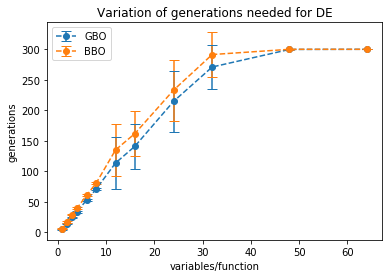

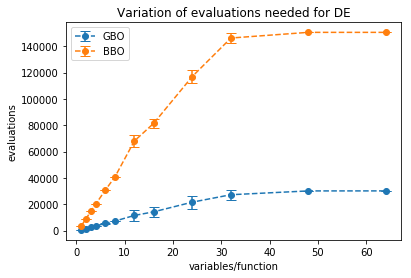

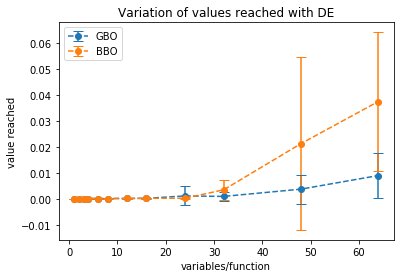

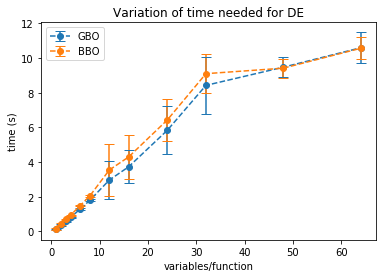

In [8]:
sphere = get_sphere()
subLs = [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# number of functions is fixed
K = 5
Ks = list(range(1, Kmax+1))

args = {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1}
# save the results, each row for a different K
times = np.zeros((len(subLs), N))
times_bbo = np.zeros((len(subLs), N))
evaluations = np.zeros((len(subLs), N))
evaluations_bbo = np.zeros((len(subLs), N))
generations = np.zeros((len(subLs), N))
generations_bbo = np.zeros((len(subLs), N))
values_reached = np.zeros((len(subLs), N))
values_reached_bbo = np.zeros((len(subLs), N))
for idx, subL in enumerate(subLs):
    print("subL {}".format(subL))
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    arguments = [args]*K

    for exp in range(N):
        gbo = GrayBoxOptimizer(functions = functions,
                          input_spaces = input_spaces,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = gas,
                          genetic_algorithm_arguments = arguments,
                          max_generations = 300,
                          goal_fitness = VTR)
        start = time()
        while not gbo.has_converged():
            gbo.evolve()
        times[idx, exp] = time() - start
        evaluations[idx, exp] = gbo.get_evaluations()
        generations[idx, exp] = gbo._generations
        values_reached[idx, exp] = gbo.get_elite_fitness()
        
        bbo = BlackBoxOptimizer(function = sphere,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = gas,
                          genetic_algorithm_arguments = arguments,
                          max_generations = 300,
                          goal_fitness = VTR)
        start = time()
        while not bbo.has_converged():
            bbo.evolve()
        times_bbo[idx, exp] = time() - start
        evaluations_bbo[idx, exp] = bbo.get_evaluations()
        generations_bbo[idx, exp] = bbo._generations
        values_reached_bbo[idx, exp] = bbo.get_elite_fitness()

plt.figure(1)
generations_means = np.mean(generations, axis=-1)
generations_errs = np.std(generations, axis=-1)
plt.errorbar(subLs, generations_means, yerr=generations_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(generations_bbo, axis=-1)
gens_bbo_errs = np.std(generations, axis=-1)
plt.errorbar(subLs, gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of generations needed for DE")
plt.xlabel("variables/function")
plt.ylabel("generations")
plt.legend(["GBO", "BBO"])

plt.figure(2)
evaluations_means = np.mean(evaluations, axis=-1)
evaluations_errs = np.std(evaluations, axis=-1)
plt.errorbar(subLs, evaluations_means, yerr=evaluations_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evaluations_bbo, axis=-1)
evals_bbo_errs = np.std(evaluations, axis=-1)
plt.errorbar(subLs, evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of evaluations needed for DE")
plt.xlabel("variables/function")
plt.ylabel("evaluations")
plt.legend(["GBO", "BBO"])

plt.figure(3)
vals_means = np.mean(values_reached, axis=-1)
vals_errs = np.std(values_reached, axis=-1)
plt.errorbar(subLs, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
vals_bbo_means = np.mean(values_reached_bbo, axis=-1)
vals_bbo_errs = np.std(values_reached_bbo, axis=-1)
plt.errorbar(subLs, vals_bbo_means, yerr=vals_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of values reached with DE")
plt.xlabel("variables/function")
plt.ylabel("value reached")
plt.legend(["GBO", "BBO"])

plt.figure(4)
times_means = np.mean(times, axis=-1)
times_errs = np.std(times, axis=-1)
plt.errorbar(subLs, times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo, axis=-1)
times_bbo_errs = np.std(times_bbo, axis=-1)
plt.errorbar(subLs, times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of time needed for DE")
plt.xlabel("variables/function")
plt.ylabel("time (s)")
plt.legend(["GBO", "BBO"])

plt.show()